In [484]:
from matplotlib import pyplot as plt
from matplotlib import patches
import shapely.geometry as sg
import descartes

In [485]:
class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def draw(self, ax):
        return ax.scatter(self.x, self.y, marker='.', color='b')

In [486]:
class Shape(Point):
    def __init__(self, x, y):
        super(Shape, self).__init__(x, y)
        
    def draw(self, ax):
        return ax.scatter(self.x, self.y, marker='x', color='b')
        
    def is_inside(self, some_point):
        if 'Point' in str(type(some_point)):
            if self.x == some_point.x and self.y == some_point.y:
                return True
            else:
                return False
        else:
            raise TypeError

In [487]:
class Square(Shape):
    def __init__(self, x, y, width):
        super(Square, self).__init__(x, y)
        self.width = width
        
    def draw(self, ax):
        rectangle = plt.Rectangle((self.x-self.width/2., self.y-self.width/2.), 
                                  self.width, 
                                  self.width, 
                                  fill=False, 
                                  edgecolor='b')
        return ax.add_patch(rectangle)
    def is_inside(self, some_point):
        if 'Point' in str(type(some_point)):
            if some_point.x>=self.x-self.width/2. and some_point.x<=self.x+self.width/2:
                if some_point.y>=self.y-self.width/2. and some_point.y<=self.y+self.width/2:
                    return True
                else:
                    return False
            else:
                return False
        else:
            raise TypeError

In [488]:
class Circle(Shape):
    def __init__(self, x, y, radius):
        super(Circle, self).__init__(x, y)
        self.radius = radius
        
    def draw(self, ax):
        circle = plt.Circle((self.x, self.y), self.radius, fill=False, edgecolor='b')
        return ax.add_patch(circle)
    
    def is_inside(self, some_point):
        if 'Point' in str(type(some_point)):
            if (self.x-some_point.x)**2 + (self.y-some_point.y)**2 <= self.radius**2:
                return True
            else:
                return False          
        else:
            raise TypeError

In [489]:
class Union(Shape):
    def __init__(self, x_circle, y_circle, radius, x_square, y_square, width):
        self.x_circle = x_circle
        self.y_circle = y_circle
        self.radius = radius
        self.x_square = x_square
        self.y_square = y_square
        self.width = width
        
    def draw(self, ax):
        circle = sg.Point(self.x_circle, self.y_circle).buffer(self.radius)
        square = sg.Polygon([(self.x_square - self.width, self.y_square - self.width), 
                             (self.x_square + self.width, self.y_square - self.width),
                             (self.x_square + self.width, self.y_square + self.width), 
                             (self.x_square - self.width, self.y_square + self.width)])
        union = circle.union(square)
        return ax.add_patch(descartes.PolygonPatch(union, fc='b', ec='k'))
    
    def is_inside(self, some_point):
        if 'Point' in str(type(some_point)):
            if some_point.x>=self.x_square-self.width/2. and some_point.x<=self.x_square+self.width/2:
                if some_point.y>=self.y_square-self.width/2. and some_point.y<=self.y_square+self.width/2:
                    return True
                else:
                    if (self.x_circle-some_point.x)**2 + (self.y_circle-some_point.y)**2 <= self.radius**2:
                        return True
                    else:
                        return False  
            else:
                if (self.x_circle-some_point.x)**2 + (self.y_circle-some_point.y)**2 <= self.radius**2:
                    return True
                else:
                    return False
        else:
            raise TypeError

In [490]:
class Intersection(Shape):
    def __init__(self, x_circle, y_circle, radius, x_square, y_square, width):
        self.x_circle = x_circle
        self.y_circle = y_circle
        self.radius = radius
        self.x_square = x_square
        self.y_square = y_square
        self.width = width
        
    def draw(self, ax):
        circle = sg.Point(self.x_circle, self.y_circle).buffer(self.radius)
        square = sg.Polygon([(self.x_square - self.width, self.y_square - self.width), 
                             (self.x_square + self.width, self.y_square - self.width),
                             (self.x_square + self.width, self.y_square + self.width), 
                             (self.x_square - self.width, self.y_square + self.width)])        
        try: 
            intersection = circle.intersection(square)
            return ax.add_patch(descartes.PolygonPatch(intersection, fc='b', ec='k'))
        except ValueError:
            return ax
        
    def is_inside(self, some_point):
        if 'Point' in str(type(some_point)):
            if some_point.x>=self.x_square-self.width/2. and some_point.x<=self.x_square+self.width/2:
                if some_point.y>=self.y_square-self.width/2. and some_point.y<=self.y_square+self.width/2:
                    if (self.x_circle-some_point.x)**2 + (self.y_circle-some_point.y)**2 <= self.radius**2:
                        return True
                    else:
                        return False
                else: 
                    return False
            else:
                return False
        else:
            raise TypeError

In [491]:
p = Point(3, 4)

In [492]:
c = Shape(2, 3)

In [493]:
c.is_inside(Point(2, 3))

True

In [494]:
c.is_inside(p)

False

In [495]:
s = Square(1, 1, 1)

In [496]:
s.is_inside(p)

False

In [497]:
s.is_inside(Point(1, 1))

True

In [498]:
s.is_inside(Square(1, 1, 1))

TypeError: 

In [499]:
m = Circle(0, 0, 0.1)

In [500]:
q = Circle(1, 1, 1)

In [501]:
p1 = Point(1, 3)

In [502]:
c1 = Shape(0, 4)

In [503]:
s1 = Square(2, 2, 0.5)

In [504]:
un = Union(1, 2.5, 0.5, 1, 3.4, 0.5)

In [505]:
un.is_inside(p)

False

In [506]:
un.is_inside(Point(1, 3))

True

In [507]:
inter = Intersection(2.5, 4.5, 0.5, 3, 4, 0.5)

In [508]:
inter2 = Intersection(2.5, 1.5, 0.5, 2.5, 2, 0.5)

In [509]:
inter.is_inside(p)

False

In [510]:
inter.is_inside(Point(2.75, 4.1))

True

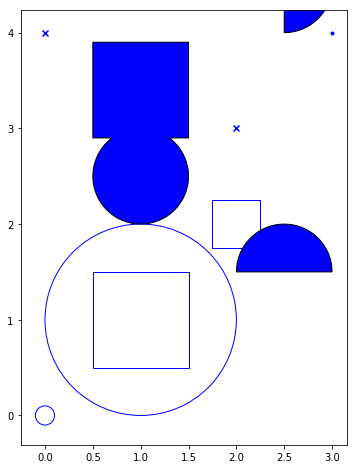

In [511]:
fig, ax = plt.subplots(figsize=(15, 8))

fig = m.draw(ax)
fig = s.draw(ax)
fig = p.draw(ax)
fig = c.draw(ax)
fig = q.draw(ax)
fig = p1.draw(ax)
fig = c1.draw(ax)
fig = s1.draw(ax)
fig = un.draw(ax)
fig = inter.draw(ax)
fig = inter2.draw(ax)
ax.set_aspect('equal')